In [ ]:
!pip install numpy pandas matplotlib scikit-learn tensorflow seaborn
!pip install tensorflow


In [2]:
#Step 2: Import Libraries
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"Classes: {np.unique(y_train)}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


In [5]:
def plot_sample_digits(X, y, n_samples=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.ravel()
    
    for i in range(n_samples):
        axes[i].imshow(X[i], cmap='gray')
        axes[i].set_title(f'Label: {y[i]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

Sample digits from the training set:


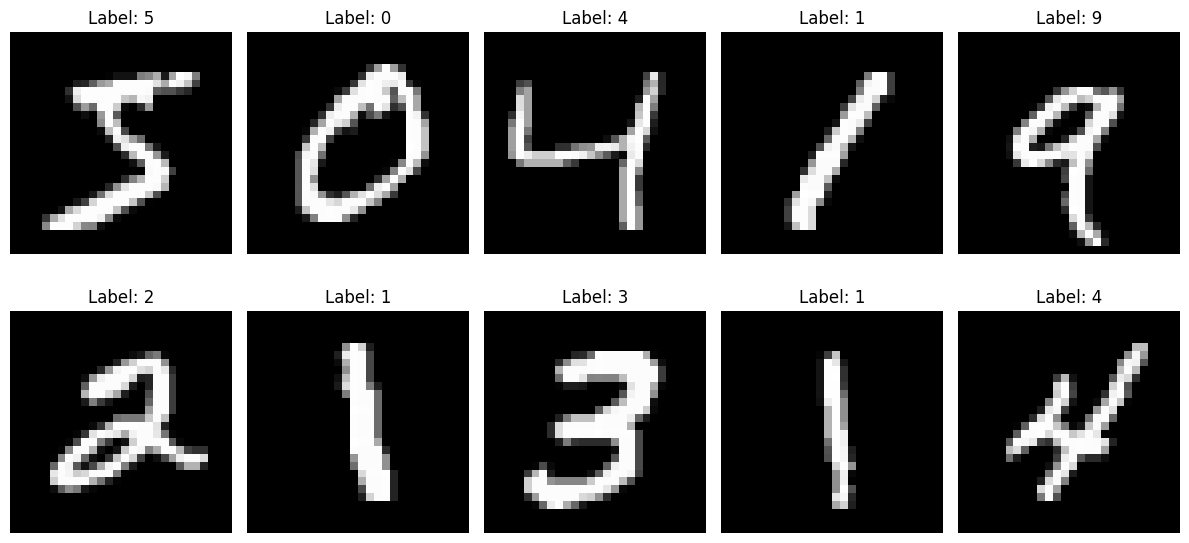

In [6]:
print("Sample digits from the training set:")
plot_sample_digits(x_train, y_train)

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"Classes: {np.unique(y_train)}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


In [9]:
def plot_sample_digits(X, y, n_samples=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.ravel()
    
    for i in range(n_samples):
        axes[i].imshow(X[i], cmap='gray')
        axes[i].set_title(f'Label: {y[i]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

Sample digits from the training set:


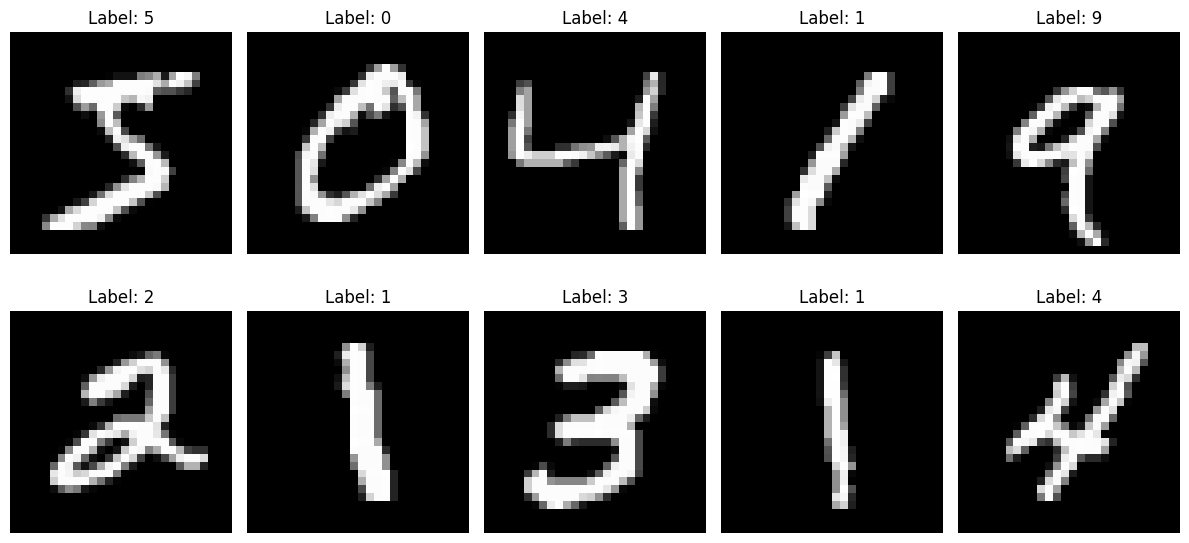

In [10]:
print("Sample digits from the training set:")
plot_sample_digits(x_train, y_train)

In [11]:
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

In [12]:
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

In [13]:
print(f"Flattened training data shape: {x_train_flat.shape}")
print(f"Flattened test data shape: {x_test_flat.shape}")

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


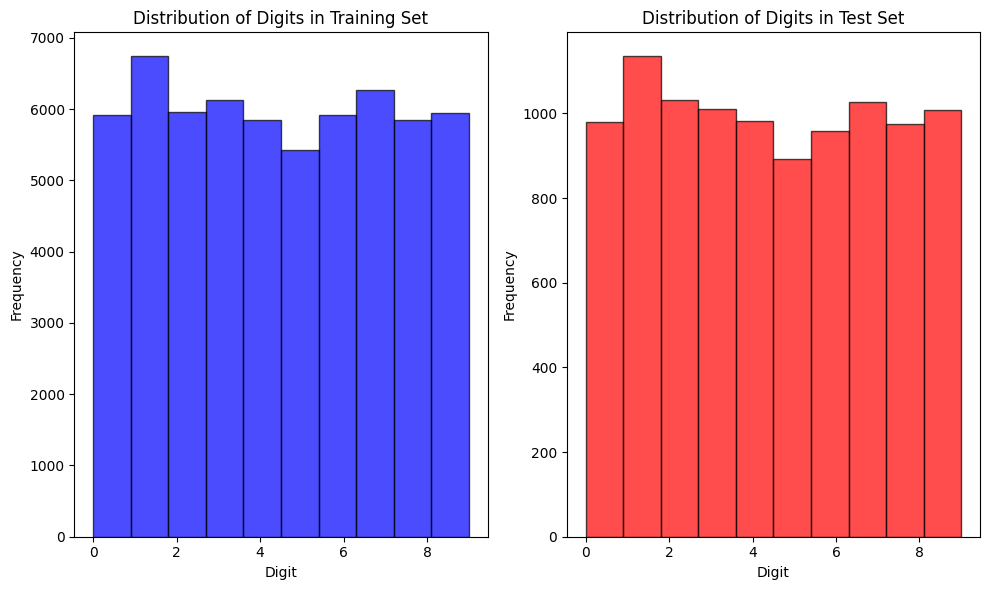

In [16]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(y_test, bins=10, alpha=0.7, color='red', edgecolor='black')
plt.title('Distribution of Digits in Test Set')
plt.xlabel('Digit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
print("Training Random Forest Classifier...")

Training Random Forest Classifier...


In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(x_train_flat, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
rf_predictions = rf_model.predict(x_test_flat)

In [23]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9704


In [24]:
print("Training Support Vector Machine...")

Training Support Vector Machine...


In [25]:
subset_size = 10000
x_train_subset = x_train_flat[:subset_size]
y_train_subset = y_train[:subset_size]

In [29]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(x_train_subset, y_train_subset)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [33]:
svm_predictions = svm_model.predict(x_test_flat)

In [35]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.9594


In [36]:
x_train_nn = x_train_normalized.reshape(-1, 28, 28, 1)
x_test_nn = x_test_normalized.reshape(-1, 28, 28, 1)

In [37]:
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print(f"Neural network input shape: {x_train_nn.shape}")
print(f"Neural network output shape: {y_train_categorical.shape}")

Neural network input shape: (60000, 28, 28, 1)
Neural network output shape: (60000, 10)


In [41]:
def create_simple_nn():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    return model

simple_nn = create_simple_nn()
simple_nn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
simple_nn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
print("Training Simple Neural Network...")
history = simple_nn.fit(
    x_train_nn, y_train_categorical,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)
test_loss, test_accuracy = simple_nn.evaluate(x_test_nn, y_test_categorical, verbose=0)
print(f"Simple Neural Network Test Accuracy: {test_accuracy:.4f}")

Training Simple Neural Network...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8539 - loss: 0.4859 - val_accuracy: 0.9580 - val_loss: 0.1461
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9368 - loss: 0.2138 - val_accuracy: 0.9678 - val_loss: 0.1095
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9537 - loss: 0.1578 - val_accuracy: 0.9742 - val_loss: 0.0879
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9611 - loss: 0.1315 - val_accuracy: 0.9778 - val_loss: 0.0790
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9656 - loss: 0.1137 - val_accuracy: 0.9798 - val_loss: 0.0776
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9708 - loss: 0.0970 - val_accuracy: 0.9792 - val_loss: 0.0729
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9736 - loss: 0.0858 - val_accuracy: 0.9808 - val_loss: 0.0711
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9752

In [43]:
def create_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    return model
cnn_model = create_cnn()
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("CNN Model Architecture:")
cnn_model.summary()

CNN Model Architecture:


C:\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
print("Training Convolutional Neural Network...")
cnn_history = cnn_model.fit(
    x_train_nn, y_train_categorical,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)


cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test_nn, y_test_categorical, verbose=0)
print(f"CNN Test Accuracy: {cnn_test_accuracy:.4f}")

Training Convolutional Neural Network...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8990 - loss: 0.3263 - val_accuracy: 0.9802 - val_loss: 0.0621
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9734 - loss: 0.0879 - val_accuracy: 0.9855 - val_loss: 0.0512
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.9811 - loss: 0.0623 - val_accuracy: 0.9893 - val_loss: 0.0422
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9852 - loss: 0.0486 - val_accuracy: 0.9887 - val_loss: 0.0404
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9877 - loss: 0.0395 - val_accuracy: 0.9897 - val_loss: 0.0366
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9895 - loss: 0.0329 - val_accuracy: 0.9903 - val_loss: 0.0349
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9913 - loss: 0.0281 - val_accuracy: 0.9900 - val_loss: 0.0332
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/

In [45]:
models_performance = {
    'Random Forest': rf_accuracy,
    'SVM': svm_accuracy,
    'Simple Neural Network': test_accuracy,
    'CNN': cnn_test_accuracy
}

(0.9, 1.0)

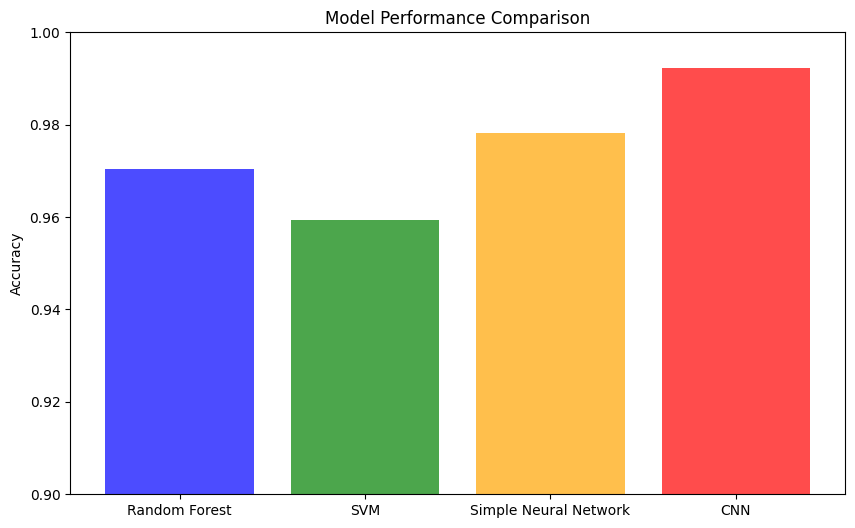

In [46]:
plt.figure(figsize=(10, 6))
models = list(models_performance.keys())
accuracies = list(models_performance.values())

bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)

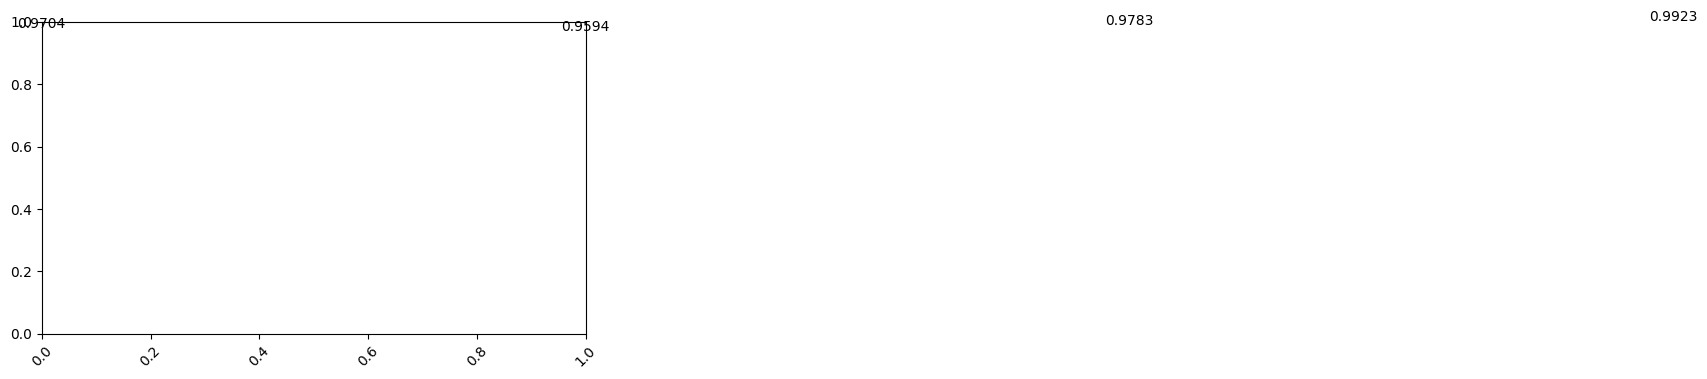

In [50]:
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{accuracy:.4f}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.25, left=0.1, right=0.95, top=0.9)
plt.show()


In [ ]:
print("\n=== MODEL PERFORMANCE SUMMARY ===")
for model, accuracy in models_performance.items():
    print(f"{model}: {accuracy:.4f}")